In [1]:
using Distributions, TimeIt, ProgressMeter, PyPlot, JLD
include("/home/postdoc/dsen/Desktop/G-ZZ/shrinkage_prior/synthetic_data/temp.jl")

run_sampler (generic function with 4 methods)

In [2]:
X, y = load("data_simple.jld", "X", "y")
d, Nobs = size(X)

(21, 40)

### Sensitivity to switching rate:

In [3]:
mb_size = 10
lambda_list = Float32.(logspace(-2,1.6,15))
lambda_list_new = logspace(1.6,1.6+3*(2+1.6)/14,4)
lambda_list_extended = Float32.(vcat(lambda_list, lambda_list_new));

1. lambda = 0.01 slowest mixing = 107.587
2. lambda = 0.018 slowest mixing = 80.467
3. lambda = 0.033 slowest mixing = 49.78
4. lambda = 0.059 slowest mixing = 31.771
5. lambda = 0.107 slowest mixing = 18.463
6. lambda = 0.193 slowest mixing = 13.178
7. lambda = 0.349 slowest mixing = 9.564
8. lambda = 0.631 slowest mixing = 8.329
9. lambda = 1.141 slowest mixing = 7.805
10. lambda = 2.062 slowest mixing = 6.898
11. lambda = 3.728 slowest mixing = 7.044
12. lambda = 6.739 slowest mixing = 6.758
13. lambda = 12.182 slowest mixing = 6.343
14. lambda = 22.022 slowest mixing = 6.383
15. lambda = 39.811 slowest mixing = 6.024
16. lambda = 39.811 slowest mixing = 5.989
17. lambda = 71.969 slowest mixing = 6.42
18. lambda = 130.103 slowest mixing = 6.523


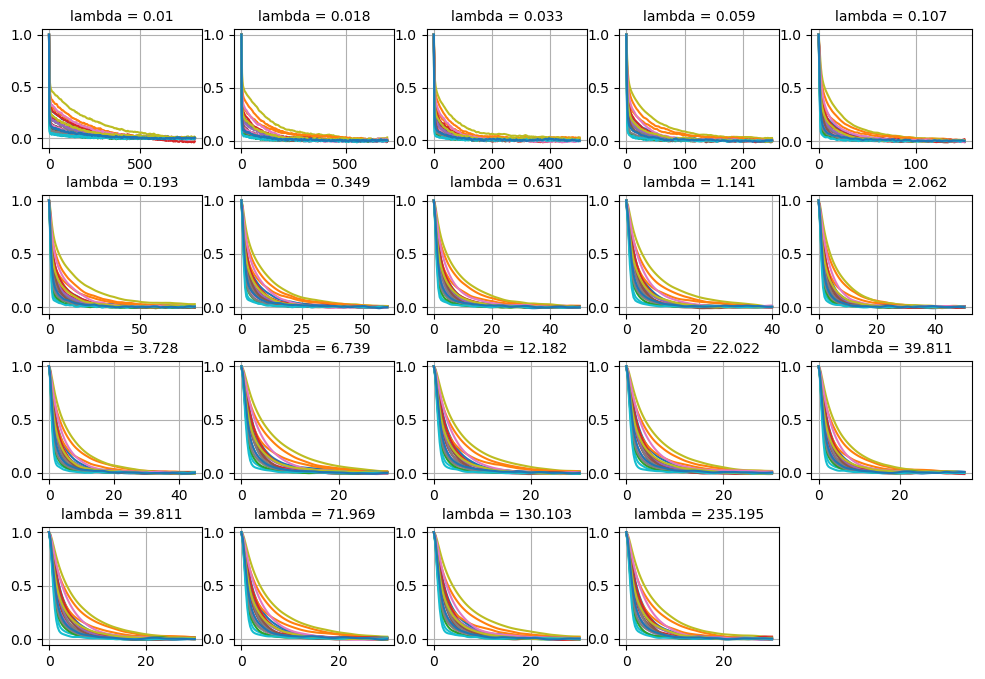

19. lambda = 235.195 slowest mixing = 6.075


In [4]:
fig = figure("pyplot_barplot",figsize=(12,8))
n_samples = 10^5-1
maxlags = [800,700,500,250,150, 160,120,100,80,100, 150,100,100,100,120, 100,100,100,100]
h_list = [1,1,1,1,1, 5e-1,5e-1,5e-1,5e-1,5e-1, 3e-1,3e-1,3e-1,3e-1,3e-1, 3e-1,3e-1,3e-1,3e-1]
discard = 0
iacts = zeros(length(lambda_list_extended))
for j in 1:4 
    for i in 1:5
        k = (j-1)*5+i
        if k <= length(lambda_list_extended)
            lambda = lambda_list_extended[k]
            filename  = "/xtmp/GZZ_data/shrinkage_prior/synthetic_data/lambda:"*
                        string(lambda)*"-d:"*string(d)*"-Nobs:"*
                        string(Nobs)*"-mb_size:"*string(mb_size)*".jld"

            xt_skel, bt_skel = load(filename, "xt_skeleton", "bt_skeleton")
            h = h_list[k]
            xi_samples = extract_samples(xt_skel[:,discard+1:end], 
                                         bt_skel[:,discard+1:end], 
                                         h,"linear")[:,1:end-1];
            subplot(4,5,k)
            maxlag = maxlags[k]
            for dim in 1:size(xi_samples,1)
                plot(h*(0:maxlag), acf(xi_samples[dim,:],maxlag))
                title("lambda = "*string(round(lambda,3)), fontsize=10)
                grid(true)
            end
            iacts[k] = maximum([sum(acf(xi_samples[dim,:],maxlag)) for dim in 1:size(xi_samples,1)])
            print(k, ". lambda = ", round(lambda,3), " slowest mixing = ", 
                   round(h*iacts[k],3), "\n")
            xt_skel, bt_skel, xi_samples = [], [], []
            gc()
        end
    end
end
subplots_adjust(hspace=0.4)

In [5]:
print(iacts)

[107.587, 80.4666, 49.7799, 31.7712, 18.4632, 26.3552, 19.1281, 16.6579, 15.6105, 13.7966, 23.4789, 22.5262, 21.1429, 21.2782, 20.0798, 19.9621, 21.4006, 21.7441, 20.2505]

In [18]:
iacts = [107.587, 80.4666, 49.7799, 31.7712, 18.4632, 
        26.3552, 19.1281, 16.6579, 15.6105, 13.7966,
        23.4789, 22.5262, 21.1429, 21.2782, 20.0798, 
        19.9621, 21.4006, 21.7441, 20.2505]
h_list = [1,1,1,1,1, 5e-1,5e-1,5e-1,5e-1,5e-1, 3e-1,3e-1,3e-1,3e-1,3e-1, 3e-1,3e-1,3e-1,3e-1];

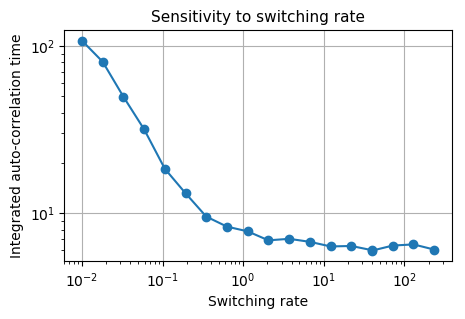

In [20]:
fig = figure("pyplot_barplot",figsize=(5,3))
plot(lambda_list_extended, h_list.*iacts, "o-")
# plot(lambda_list_new, 1./log.(1+lambda_list_new), label="theory")
xscale("log")
yscale("log")
xlabel("Switching rate")
ylabel("Integrated auto-correlation time")
title("Sensitivity to switching rate", fontsize=11)
grid(true)
savefig("/home/postdoc/dsen/Desktop/G-ZZ/plots/shrinkageprior_swrate_sensitivity.pdf", 
    format="pdf", dpi=10_000, bbox_inches="tight")

### Sensitivity to minibatch size:

In [7]:
mb_size_list = 1:5
lambda_list = [0.01, 0.107, 12.182];

1. lambda = 0.01, mb size = 1 slowest mixing = 194.046
2. lambda = 0.01, mb size = 2 slowest mixing = 189.669
3. lambda = 0.01, mb size = 3 slowest mixing = 116.044
4. lambda = 0.01, mb size = 4 slowest mixing = 182.859
5. lambda = 0.01, mb size = 5 slowest mixing = 150.031
6. lambda = 0.11, mb size = 1 slowest mixing = 21.229
7. lambda = 0.11, mb size = 2 slowest mixing = 22.274
8. lambda = 0.11, mb size = 3 slowest mixing = 20.581
9. lambda = 0.11, mb size = 4 slowest mixing = 19.991
10. lambda = 0.11, mb size = 5 slowest mixing = 18.745
11. lambda = 12.18, mb size = 1 slowest mixing = 9.522
12. lambda = 12.18, mb size = 2 slowest mixing = 8.979
13. lambda = 12.18, mb size = 3 slowest mixing = 8.137
14. lambda = 12.18, mb size = 4 slowest mixing = 8.223
15

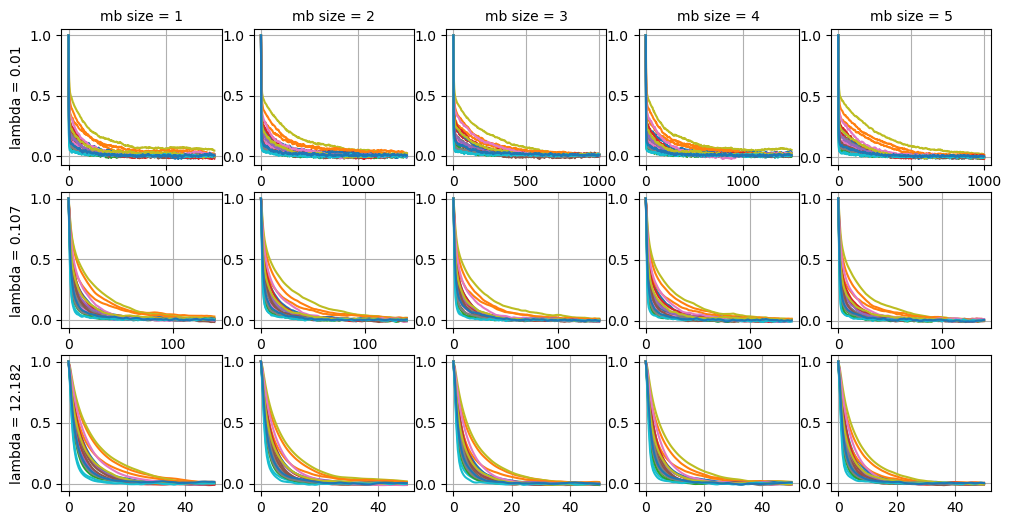

. lambda = 12.18, mb size = 5 slowest mixing = 7.2


In [8]:
fig = figure("pyplot_barplot",figsize=(12,6))

maxlags, h_list, iacts = Int.(zeros(3,5)), zeros(3,5), zeros(3,5)
maxlags[1,:] = [500,500,500,500,500]
maxlags[2,:] = [200,200,200,200,200]
maxlags[3,:] = [100,100,100,100,100]
h_list[1,:] = [3,3,2,3,2]
h_list[2,:] = [7e-1,7e-1,7e-1,7e-1,7e-1]
h_list[3,:] = [5e-1,5e-1,5e-1,5e-1,5e-1]

discard = 0

for (i,lambda) in enumerate(lambda_list) 
    for (j,mb_size) in enumerate(mb_size_list) 
        filename = "/xtmp/GZZ_data/shrinkage_prior/synthetic_data/lambda:"*
                    string(lambda)*"-d:"*string(d)*"-Nobs:"*
                    string(Nobs)*"-mb_size:"*string(mb_size)*".jld"
        xt_skel, bt_skel = load(filename, "xt_skeleton", "bt_skeleton")
        
        h = h_list[i,j]
        xi_samples = extract_samples(xt_skel[:,discard+1:end], 
                                     bt_skel[:,discard+1:end], 
                                     h,"linear")[:,1:end-1];
        k = (i-1)*5+j
        subplot(3,5,k)
        maxlag = maxlags[i,j]
        for dim in 1:size(xi_samples,1)
            plot(h*(0:maxlag), acf(xi_samples[dim,:],maxlag))
            grid(true)
        end
        if i == 1 title("mb size = "*string(mb_size), fontsize=10) end
        if j == 1 ylabel("lambda = "*string(round(lambda,3))) end
        
        iacts[i,j] = maximum([sum(acf(xi_samples[dim,:],maxlag)) for dim in 1:size(xi_samples,1)])
        print(k, ". lambda = ", round(lambda,2), ", mb size = ", mb_size, 
                " slowest mixing = ", round(h*iacts[i,j],3), "\n")
        xt_skel, bt_skel, xi_samples = [], [], []
        gc()
    
    end
end

In [9]:
print(iacts)

[64.6819 63.223 58.0219 60.9531 75.0155; 30.3266 31.8207 29.4011 28.5585 26.7792; 19.0444 17.9578 16.273 16.4454 14.3991]

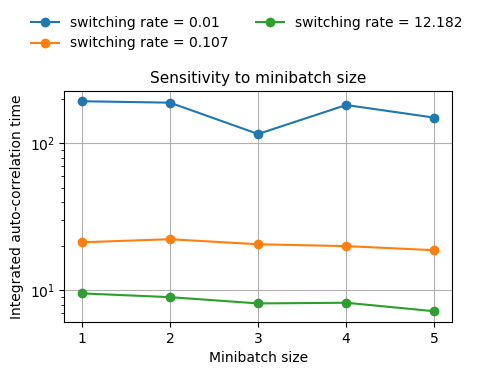

In [28]:
mb_size_list = 1:5
lambda_list = [0.01, 0.107, 12.182];
h_list = zeros(3,5)
h_list[1,:] = [3,3,2,3,2]
h_list[2,:] = [7e-1,7e-1,7e-1,7e-1,7e-1]
h_list[3,:] = [5e-1,5e-1,5e-1,5e-1,5e-1]

iacts = [64.6819 63.223 58.0219 60.9531 75.0155; 
            30.3266 31.8207 29.4011 28.5585 26.7792; 
            19.0444 17.9578 16.273 16.4454 14.3991]

fig = figure("pyplot_barplot",figsize=(5,3))
for (i,lambda) in enumerate(lambda_list)
    plot(mb_size_list,h_list[i,:].*iacts[i,:], "o-", label="switching rate = "*string(round(lambda,3)))
end
legend(bbox_to_anchor=(-0.1, 1.35), loc=2, borderaxespad=0.0, ncol=2, fontsize=10, frameon=false)
grid(true)
yscale("log")
xticks(mb_size_list)
xlabel("Minibatch size")
title("Sensitivity to minibatch size", fontsize=11)
ylabel("Integrated auto-correlation time")
savefig("/home/postdoc/dsen/Desktop/G-ZZ/plots/shrinkageprior_mbsize_sensitivity.pdf", 
    format="pdf", dpi=10_000, bbox_inches="tight")

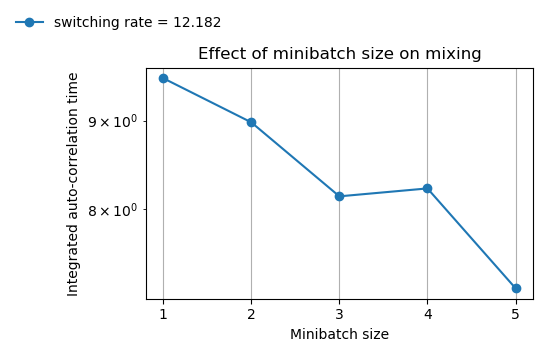

In [9]:
fig = figure("pyplot_barplot",figsize=(5,3))
i = 3 
lambda = lambda_list[i]
plot(mb_size_list,h_list[i,:].*iacts[i,:], "o-", label="switching rate = "*string(round(lambda,3)))
legend(bbox_to_anchor=(-0.35, 1.25), loc=2, borderaxespad=0.0, ncol=3, fontsize=10, frameon=false)
grid(true)
yscale("log")
xticks(mb_size_list)
xlabel("Minibatch size")
title("Effect of minibatch size on mixing")
ylabel("Integrated auto-correlation time");